In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# paths
raw_path = os.path.join(os.path.pardir, 'data', 'raw')
train_path = os.path.join(raw_path, 'train.csv')
test_path = os.path.join(raw_path, 'test.csv')

In [3]:
# loading in dataframe
train = pd.read_csv(train_path, index_col='PassengerId')
test = pd.read_csv(test_path, index_col='PassengerId')

In [4]:
type(train)

pandas.core.frame.DataFrame

# Basic structure

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
test['Survived'] = -888

In [8]:
df = pd.concat((train, test), axis=0)

C:\Users\Kiosk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [10]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [11]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [12]:
type(df.Name)

pandas.core.series.Series

# Stats

In [13]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [14]:
# Centrality measures
print('Mean fare: {0}'.format(df.Fare.mean()))
print('Median fare: {0}'.format(df.Fare.median()))

Mean fare: 33.2954792813456
Median fare: 14.4542


In [15]:
# Dispersion Measures
print('Min fare: {0}'.format(df.Fare.min())) # min
print('Max fare: {0}'.format(df.Fare.max())) # max
print('Range fare: {0}'.format(df.Fare.max() - df.Fare.min())) # range
print('25 percentile: {0}'.format(df.Fare.quantile(.25)))
print('50 percentile: {0}'.format(df.Fare.quantile(.50)))
print('75 percentile: {0}'.format(df.Fare.quantile(.75)))
print('Variance fare: {0}'.format(df.Fare.var()))
print('25 percentile: {0}'.format(df.Fare.std()))

Min fare: 0.0
Max fare: 512.3292
Range fare: 512.3292
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275
Variance fare: 2678.959737892894
25 percentile: 51.75866823917414


In [16]:
%matplotlib inline

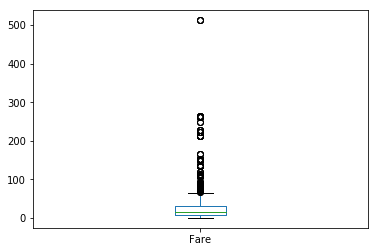

In [17]:
# box plot
df.Fare.plot(kind = 'box')

In [18]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [19]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [20]:
# Proportion
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [21]:
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

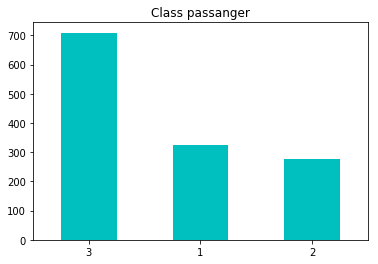

In [23]:
df.Pclass.value_counts().plot(kind='bar', rot = 0, title='Class passanger', color='c');

# Distributions

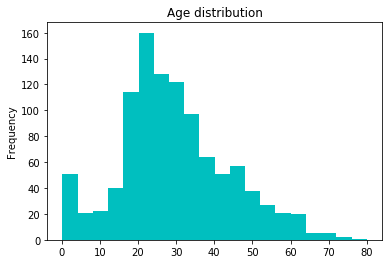

In [24]:
df.Age.plot(kind='hist', title='Age distribution', color = 'c', bins=20);

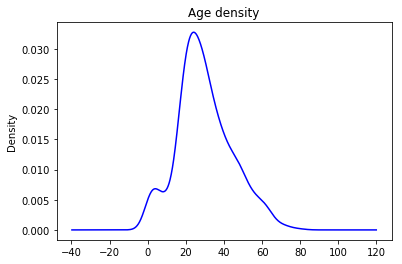

In [25]:
df.Age.plot(kind='kde', title='Age density', color = 'b');

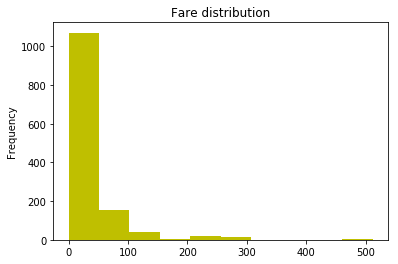

In [26]:
df.Fare.plot(kind='hist', title = 'Fare distribution', color='y');

In [27]:
print('skness for age: {0:.2f}'.format(df.Age.skew()))
print('skness for fare: {0:.2f}'.format(df.Fare.skew()))

skness for age: 0.41
skness for fare: 4.37


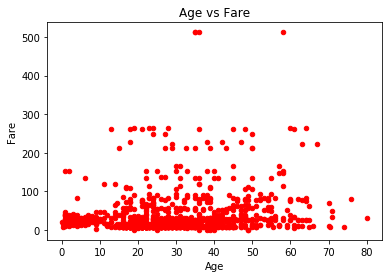

In [28]:
df.plot.scatter(x='Age', y='Fare', color='r', title='Age vs Fare');

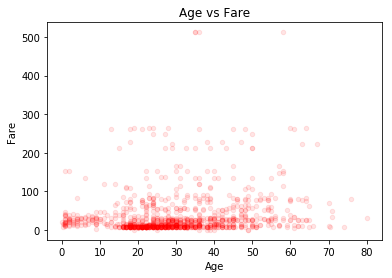

In [29]:
df.plot.scatter(x='Age', y='Fare', color='r', title='Age vs Fare', alpha=0.1);

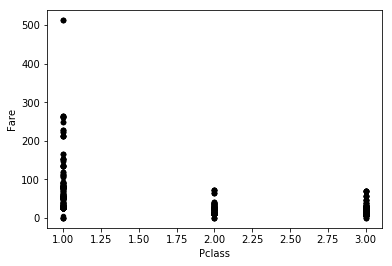

In [30]:
df.plot.scatter(x='Pclass', y='Fare', color='k');

# Grouping and Aggregations

In [31]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [32]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [33]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [34]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [35]:
df.groupby(['Pclass'])['Fare', 'Age'].agg({'Fare': 'mean', 'Age': 'mean'})

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [36]:
aggregations = {
    'Fare': {
        'mean_fare': 'mean',
        'median_fare': 'median',
        'max_fare': max,
        'min_fare': np.min
    },
    'Age': {
        'median_age': 'median',
        'min_age': min,
        'max_age': max,
        'range': lambda x: max(x) - min(x)
    }
}

In [37]:
df.groupby(['Pclass']).agg(aggregations)

C:\Users\Kiosk\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_fare median_fare  max_fare min_fare median_age min_age max_age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

               
        range  
Pclass         
1       79.08  
2       69.33  
3       73.83

In [38]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

# Crosstab

In [39]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


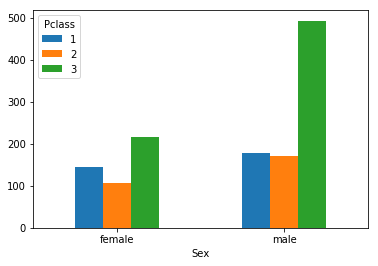

In [40]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar', rot=0);

# Pivot table

In [41]:
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [42]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


# Data Munging

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Feature Embarked

In [44]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [45]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [46]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [47]:
# let's see which pclass is near the fear for missing values
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

We can see that both passangers were Pclass 1 and fare was 80. Son cabin C is more close

In [48]:
df.Embarked.fillna('C',inplace=True)

In [49]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Feature: Fare

In [51]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [52]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [53]:
df.Fare.fillna(median_fare, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


# Feature Age

In [55]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1,2677


### Option 1: replace all missing values

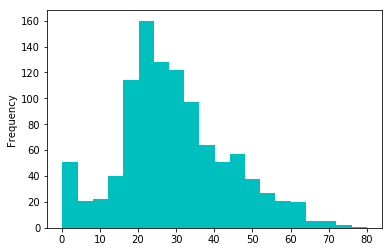

In [56]:
df.Age.plot(kind='hist', bins=20, color='c')

In [57]:
df.Age.mean()

29.881137667304014

With the mean we may have troubles with outlier

### Option 2: replace with median age of gender

In [58]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

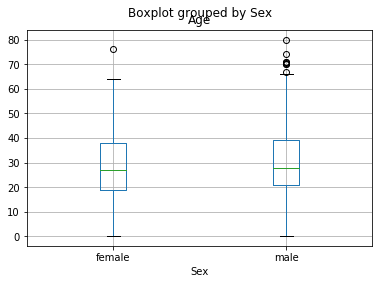

In [59]:
df[df.Age.notnull()].boxplot('Age','Sex');

Very similar, let's explore more options

### Option 3: replace with median of Pclass

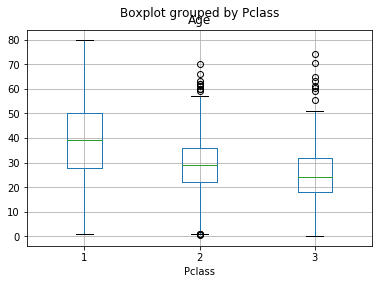

In [60]:
df[df.Age.notnull()].boxplot('Age', 'Pclass')

### Replace with median age by tittle

In [61]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [62]:
def getTitle(name):
    TITLES = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'miss': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'dr': 'Officer',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'major': 'Officer',
        'lady': 'Lady',
        'sir': 'Sir',
        'mlle': 'Miss',
        'col': 'Officer',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    name = name.split(',')[1]
    title = name.split('.')[0]
    title = title.strip().lower()
    return TITLES[title]

In [63]:
df.Name.map(lambda x: getTitle(x)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [64]:
df['Title'] = df.Name.map(lambda x: getTitle(x))

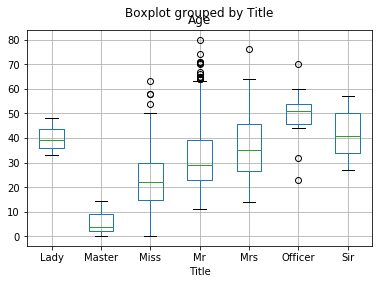

In [65]:
df[df.Age.notnull()].boxplot('Age','Title')

In [66]:
title_median_age = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_median_age, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


# Outliers

## Age

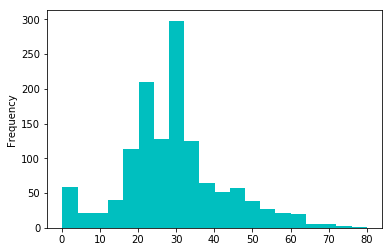

In [68]:
df.Age.plot(kind='hist', bins=20, color = 'c');

## Fare

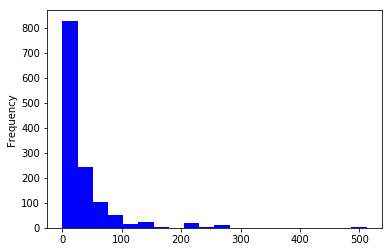

In [69]:
df.Fare.plot(kind='hist', bins=20, color='b');

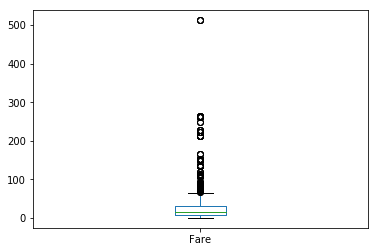

In [70]:
df.Fare.plot(kind='box');

In [71]:
df.loc[df.Fare == df.Fare.max() ]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [72]:
# Try transformation
logFare = np.log(df.Fare + 1.0) # TO avoid log(0)

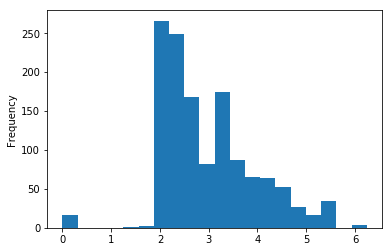

In [73]:
logFare.plot(kind='hist', bins=20);

In [74]:
# Binning
pd.qcut(df.Fare, 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])

PassengerId
1        Very_Low
2       Very_High
3             Low
4       Very_High
5             Low
6             Low
7       Very_High
8            High
9             Low
10           High
11           High
12           High
13            Low
14           High
15       Very_Low
16           High
17           High
18            Low
19           High
20       Very_Low
21           High
22            Low
23            Low
24      Very_High
25           High
26      Very_High
27       Very_Low
28      Very_High
29       Very_Low
30       Very_Low
          ...    
1280     Very_Low
1281         High
1282    Very_High
1283    Very_High
1284         High
1285          Low
1286         High
1287    Very_High
1288     Very_Low
1289    Very_High
1290     Very_Low
1291     Very_Low
1292    Very_High
1293         High
1294    Very_High
1295    Very_High
1296         High
1297          Low
1298          Low
1299    Very_High
1300     Very_Low
1301          Low
1302     Very_Low
1303    Very_Hig

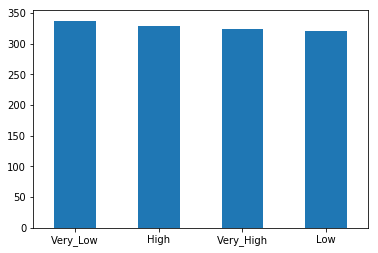

In [75]:
pd.qcut(df.Fare, 4, labels=['Very_Low', 'Low', 'High', 'Very_High']).value_counts().plot(kind='bar', rot=0);

In [76]:
df['Fare_bins'] = pd.qcut(df.Fare, 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])

# Feature engeneering

## Age feature

In [77]:
# AgeState base on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [78]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


## Family feature

In [79]:
df['FamilySize'] = df.Parch + df.SibSp + 1

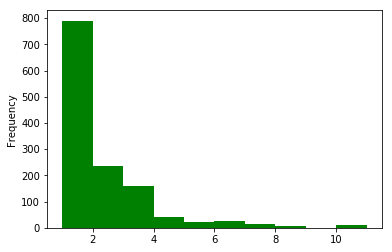

In [80]:
df['FamilySize'].plot(kind='hist', color='g');

In [81]:
df.loc[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_bins,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,Very_High,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,Very_High,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,Very_High,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,Very_High,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,Very_High,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr,Very_High,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,Very_High,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,Very_High,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,Very_High,Adult,11


In [82]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


## isMother feature

In [83]:
df['isMother'] = np.where(( (df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss') ), 1, 0)

In [84]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].isMother)

isMother,0,1
Survived,,
0,533,16
1,303,39


## Deck

In [85]:
df.Cabin

PassengerId
1               NaN
2               C85
3               NaN
4              C123
5               NaN
6               NaN
7               E46
8               NaN
9               NaN
10              NaN
11               G6
12             C103
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              D56
23              NaN
24               A6
25              NaN
26              NaN
27              NaN
28      C23 C25 C27
29              NaN
30              NaN
           ...     
1280            NaN
1281            NaN
1282            B24
1283            D28
1284            NaN
1285            NaN
1286            NaN
1287            C31
1288            NaN
1289            B41
1290            NaN
1291            NaN
1292             C7
1293            NaN
1294            NaN
1295            NaN
1296            D40
1297            D38
1298    

In [86]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [87]:
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_bins,AgeState,FamilySize,isMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,Very_High,Adult,1,0


In [88]:
df.loc[df.Cabin == 'T', 'Cabin'] =np.NaN

In [89]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [90]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [91]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [92]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_bins     1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
isMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


# Categorical feature encoding

In [95]:
#sex
df['isMale'] = np.where(df.Sex=='male',1,0)

In [99]:
df= pd.get_dummies(df, columns=['Deck','Pclass','Title','Fare_bins','Embarked','AgeState'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                    1309 non-null float64
Cabin                  294 non-null object
Fare                   1309 non-null float64
Name                   1309 non-null object
Parch                  1309 non-null int64
Sex                    1309 non-null object
SibSp                  1309 non-null int64
Survived               1309 non-null int64
Ticket                 1309 non-null object
FamilySize             1309 non-null int64
isMother               1309 non-null int32
isMale                 1309 non-null int32
Deck_A                 1309 non-null uint8
Deck_B                 1309 non-null uint8
Deck_C                 1309 non-null uint8
Deck_D                 1309 non-null uint8
Deck_E                 1309 non-null uint8
Deck_F                 1309 non-null uint8
Deck_G                 1309 non-null uint8
Deck_Z                 1309 non-null uint8
Pclass_1               130

# Drop Columns

In [106]:
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [108]:
columns = [cols for cols in df.columns if cols!='Survived']
columns = ['Survived'] + columns
df = df[columns]

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived               1309 non-null int64
Age                    1309 non-null float64
Fare                   1309 non-null float64
FamilySize             1309 non-null int64
isMother               1309 non-null int32
isMale                 1309 non-null int32
Deck_A                 1309 non-null uint8
Deck_B                 1309 non-null uint8
Deck_C                 1309 non-null uint8
Deck_D                 1309 non-null uint8
Deck_E                 1309 non-null uint8
Deck_F                 1309 non-null uint8
Deck_G                 1309 non-null uint8
Deck_Z                 1309 non-null uint8
Pclass_1               1309 non-null uint8
Pclass_2               1309 non-null uint8
Pclass_3               1309 non-null uint8
Title_Lady             1309 non-null uint8
Title_Master           1309 non-null uint8
Title_Miss             1309 non-null uint8
Title_Mr               1309 n

# Save processed data

In [111]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
train_path_pross = os.path.join(processed_data_path, 'train.csv')
test_path_pross = os.path.join(processed_data_path, 'test.csv')

In [113]:
df.loc[df.Survived != -888].to_csv(train_path_pross)
columns = [cols for cols in df.columns if cols!='Survived']
df.loc[df.Survived == -888, columns].to_csv(test_path_pross)

## Build script